# imports

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import os
import time
import prepare
import json

import pandas as pd
import numpy as np
import unicodedata
#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#play with words
import nltk
import re
from pprint import pprint

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

import wrangle

from sklearn.model_selection import train_test_split

In [2]:
new_df = wrangle.get_dataframe()

In [3]:
new_df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,lem_len
0,Project-MONAI/MONAI,Python,"<p align=""center""> <img width=""50%"" alt='proje...",p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,1542
1,microsoft/HealthBotContainerSample,JavaScript,# Health Bot Container A simple web page that ...,health bot container simple web page allows us...,health bot container simple web page allows us...,health bot container simple web page allows us...,1647
2,TheAlphamerc/flutter_healthcare_app,other,## flutter_healthcare_app ![Twitter [![GitHub ...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,1187
3,nextgenhealthcare/connect,Java,# Mirth® Connect by NextGen Healthcare 1. [Use...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,6110
4,HealthCatalyst/healthcareai-r,other,--- output: github_document --- <!-- README.md...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,2142


In [4]:
train, validate, test = wrangle.split_data(new_df, 'language')
HTML_words_df, JavaScript_words_df, Java_words_df, Python_words_df, other_words_df, other_words, Python_words, Java_words, JavaScript_words, HTML_words, other_words_freq, Python_words_freq, Java_words_freq, JavaScript_words_freq, HTML_words_freq, word_counts, all_words, all_freq, all_words_df = wrangle.all_words_function(train)

# what bigram words occur the most in each programming language

<Axes: >

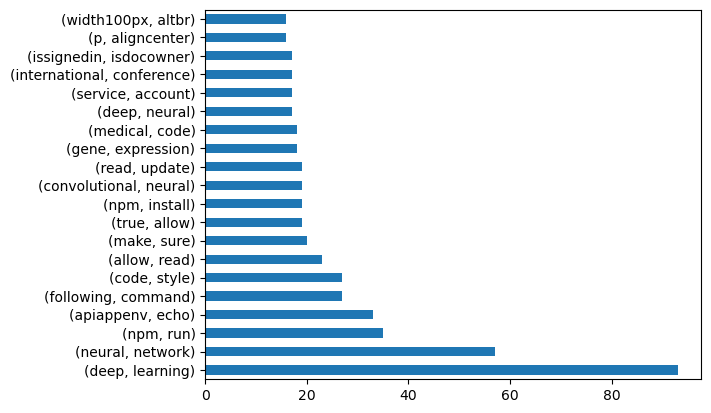

In [5]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(20).plot.barh()

<Axes: >

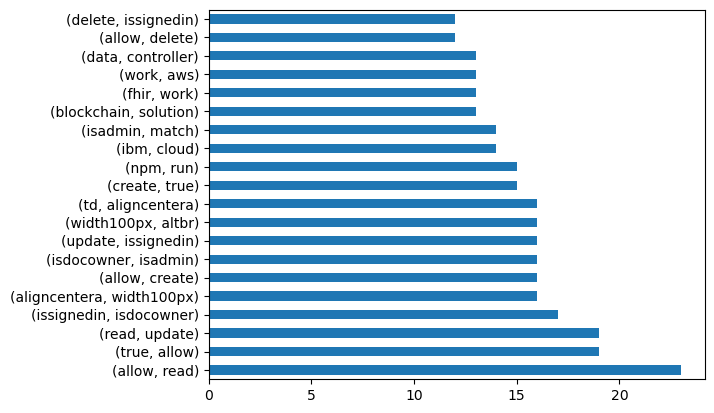

In [6]:
pd.Series(nltk.bigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

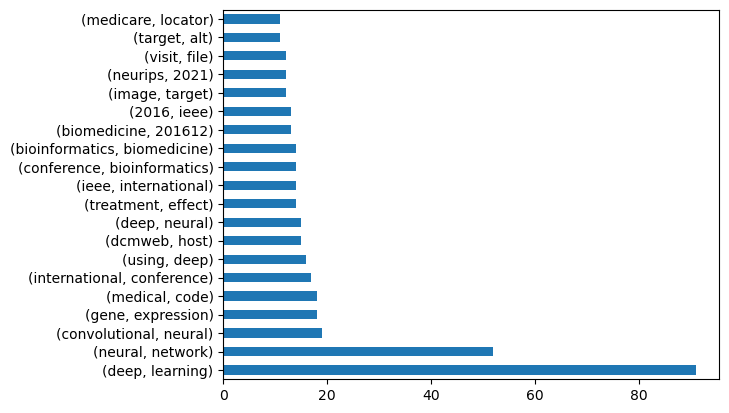

In [7]:
pd.Series(nltk.bigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

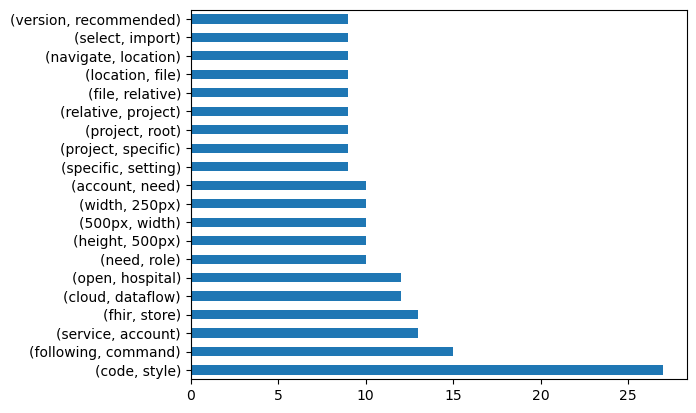

In [8]:
pd.Series(nltk.bigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

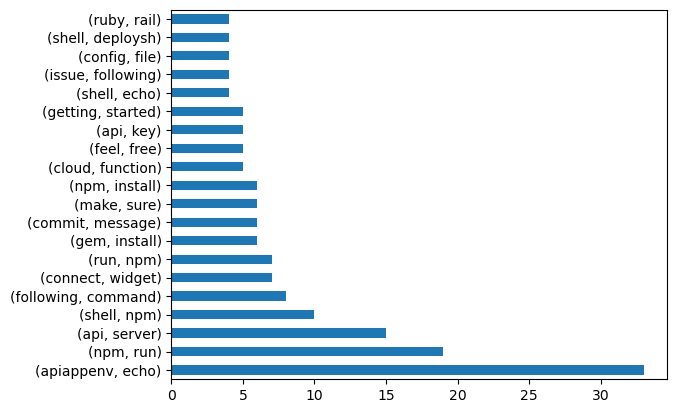

In [9]:
pd.Series(nltk.bigrams(JavaScript_words)).value_counts().head(20).plot.barh()

# Do different programming languages use a different number of unique words?

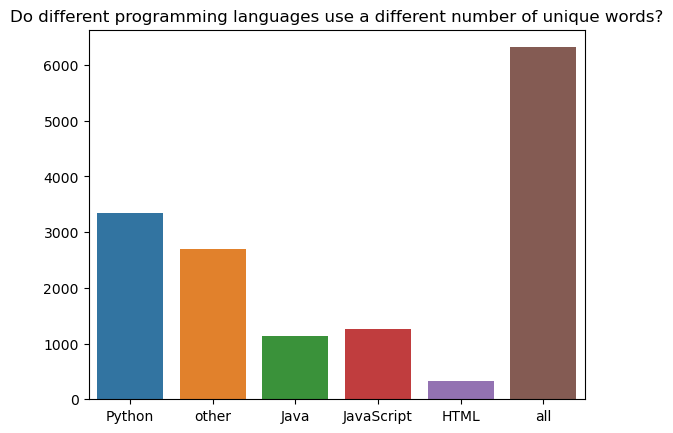

In [10]:
wrangle.visual_one(Python_words_df,other_words_df, Java_words_df, JavaScript_words_df, all_words_df, HTML_words_df)

# what trigram words occur the most in each programming language

<Axes: >

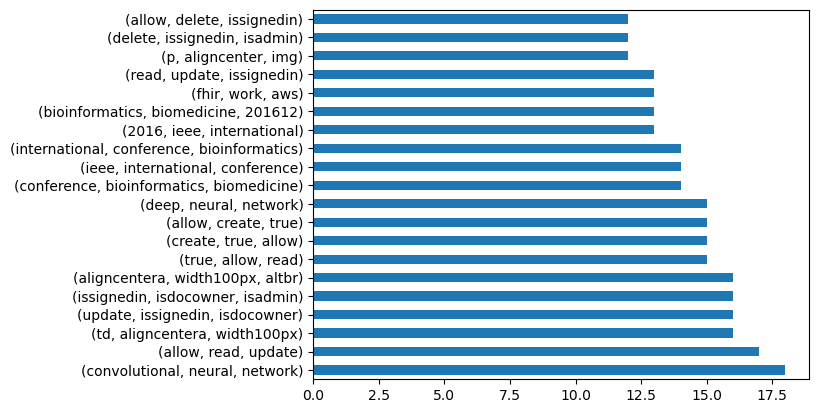

In [11]:
pd.Series(nltk.trigrams(all_words)).value_counts().head(20).plot.barh()

<Axes: >

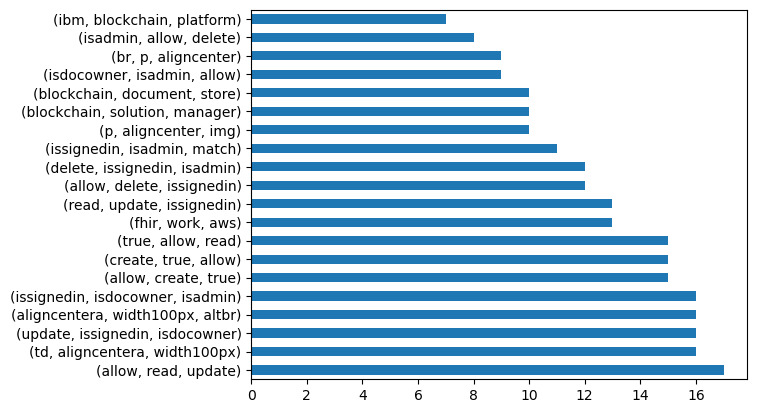

In [12]:
pd.Series(nltk.trigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

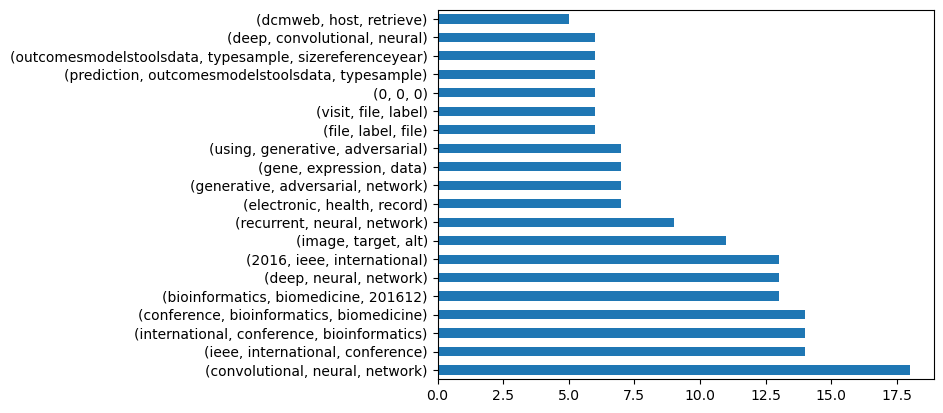

In [13]:
pd.Series(nltk.trigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

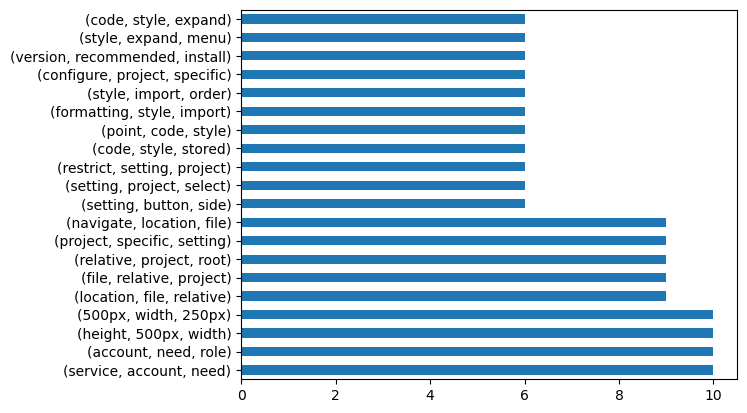

In [14]:
pd.Series(nltk.trigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

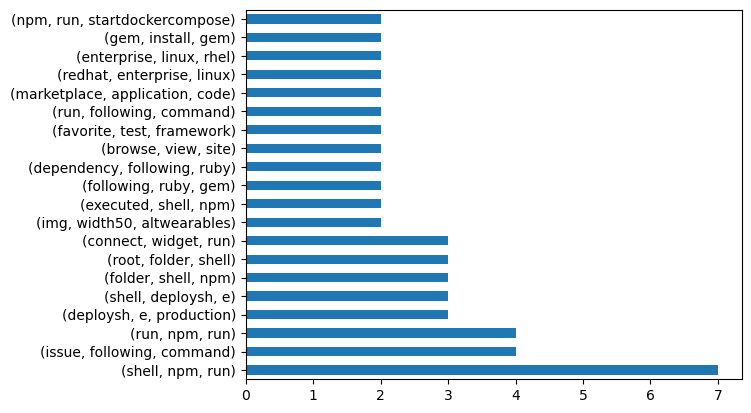

In [15]:
pd.Series(nltk.trigrams(JavaScript_words)).value_counts().head(20).plot.barh()

<Axes: >

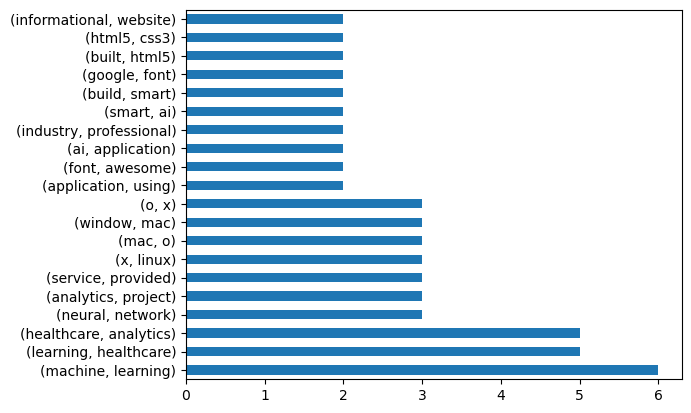

In [16]:
pd.Series(nltk.bigrams(HTML_words)).value_counts().head(20).plot.barh()

# what is the % of each programming language for the most common 20 words

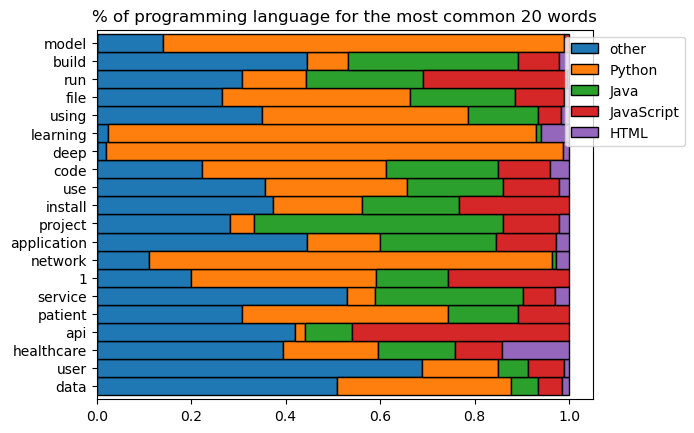

In [17]:
wrangle.visual_two(word_counts)

# Stats test

In [23]:
answer = wrangle.get_stats_test(train)
print('p value', answer[1])

p value 0.3114673218259596


# Modeling

In [19]:
the_df, X_test_bow, y_test = wrangle.get_train(new_df)

In [20]:
the_df

,model_train,train_predict,validate_predict
0,baseline,0.382,0.382
1,KNeighborsClassifier,0.4,0.381
2,LogisticRegression,1.0,0.333
3,RandomForestClassifier,0.7,0.381
4,DecisionTreeClassifier,0.967,0.429
